In [35]:
set.seed(123)
options(warn=-1)
library("dplyr")
dt <- read.csv("Data\\USvideos_catNames.csv")
dt <- dt[which(dt$category_id == "Comedy" | dt$category_id == "Music"  | dt$category_id == "Sports"),]
dt <- sample_n(dt,100)
ds <- dt[,c("video_id","views","likes","dislikes","comment_count","category_id")]

ds <- na.omit(ds)

normalized<-function(y) {

  x<-y[!is.na(y)]

  x<-(x - min(x)) / (max(x) - min(x))

  y[!is.na(y)]<-x

  return(y)
}
ds$views <- normalized(ds$views)
ds$likes <- normalized(ds$likes)
ds$dislikes <- normalized(ds$dislikes)
ds$comment_count <- normalized(ds$comment_count)


ds.train <-ds[1:70,c("views","likes","dislikes","comment_count","category_id")]
ds.test <- ds[71:100,c("views","likes","dislikes","comment_count","category_id")]



ds.train$category_id <- droplevels(ds.train$category_id)
ds.test$category_id <- droplevels(ds.test$category_id)



In [36]:
prop.table(table(ds.train$category_id))
prop.table(table(ds.test$category_id))


   Comedy     Music    Sports 
0.2428571 0.5285714 0.2285714 


Comedy  Music Sports 
   0.2    0.4    0.4 


Call:
 randomForest(formula = category_id ~ ., data = ds.train, importance = TRUE,      ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 35.71%
Confusion matrix:
       Comedy Music Sports class.error
Comedy      9     7      1   0.4705882
Music       3    27      7   0.2702703
Sports      1     6      9   0.4375000

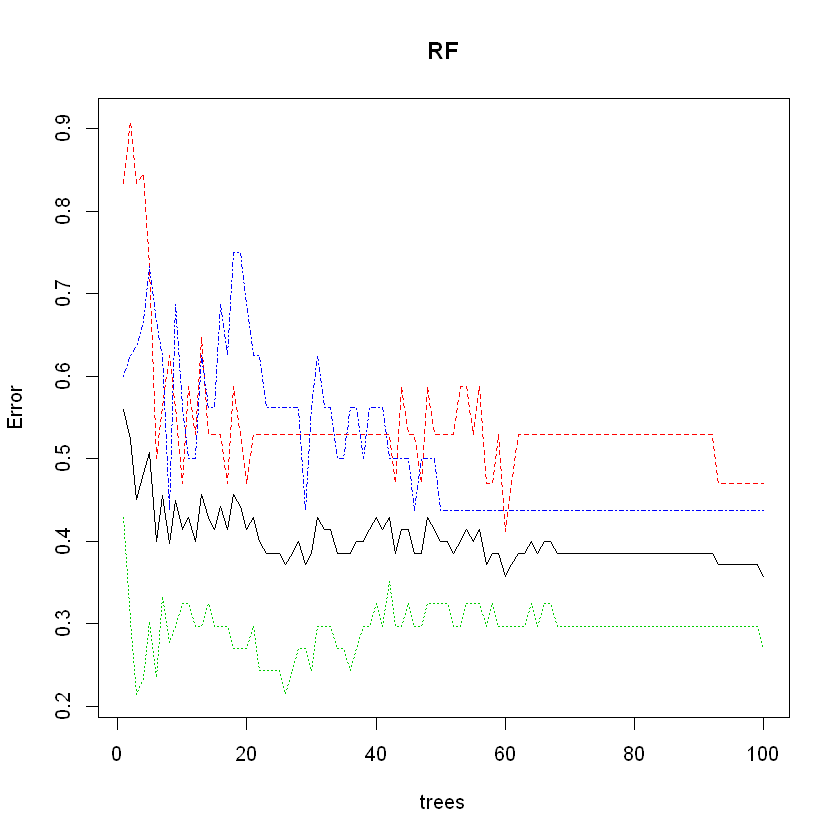

In [37]:

library(party)
library(randomForest)

RF <- randomForest(formula = category_id ~. , data = ds.train ,importance = TRUE, ntree = 100)

RF

plot(RF)


In [38]:
RF.train_res <- predict(RF, ds.train, type = "class")
table(RF.train_res , ds.train$category_id)  
mean(RF.train_res  == ds.train$category_id)

            
RF.train_res Comedy Music Sports
      Comedy     17     0      0
      Music       0    37      0
      Sports      0     0     16

[1] 1

In [39]:
RF.test_res <- predict(RF, ds.test , type = "class")
mean(RF.test_res == ds.test$category_id)                    
table(RF.test_res, ds.test$category_id)  

[1] 0.6333333

           
RF.test_res Comedy Music Sports
     Comedy      3     2      2
     Music       2    10      4
     Sports      1     0      6

              MeanDecreaseGini
views                 9.110894
likes                14.092061
dislikes              8.391805
comment_count        10.440954


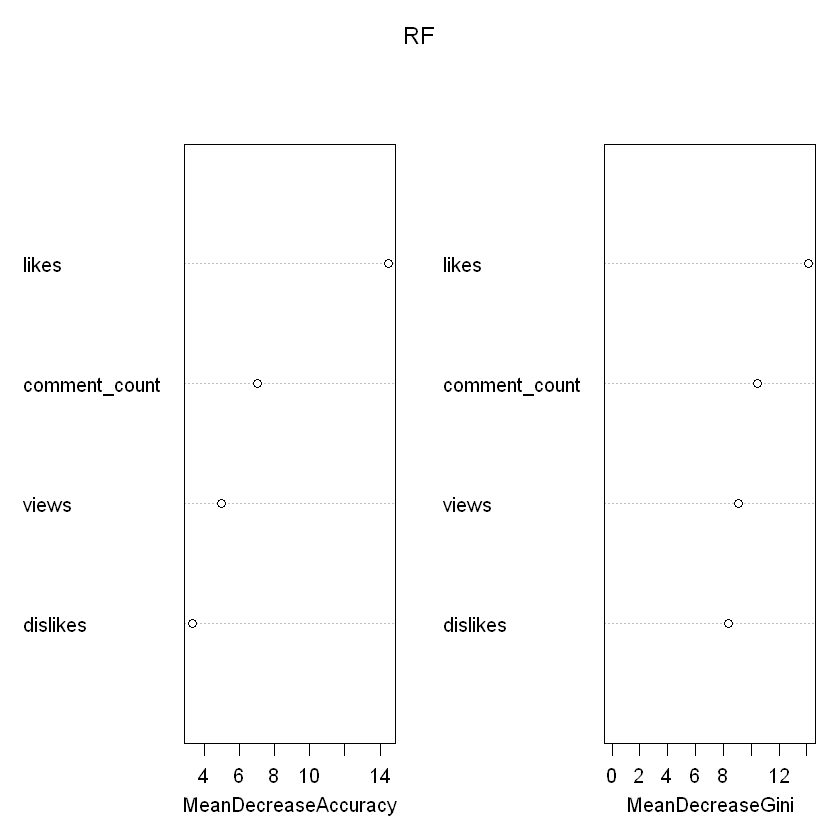

In [40]:
print(importance(RF,type = 2)) 
varImpPlot(RF)


Call:
C5.0.formula(formula = category_id ~ ., data = ds.train)


C5.0 [Release 2.07 GPL Edition]  	Wed May 06 02:06:54 2020
-------------------------------

Class specified by attribute `outcome'

Read 70 cases (5 attributes) from undefined.data

Decision tree:

likes <= 0.003889425:
:...comment_count <= 0.0005959476:
:   :...dislikes <= 0.0001804822: Sports (3)
:   :   dislikes > 0.0001804822: Comedy (3)
:   comment_count > 0.0005959476:
:   :...views > 0.001894471: Sports (9/1)
:       views <= 0.001894471:
:       :...comment_count > 0.001427085: Music (4)
:           comment_count <= 0.001427085:
:           :...likes <= 0.001333003: Music (2)
:               likes > 0.001333003: Sports (2)
likes > 0.003889425:
:...likes <= 0.005849954: Comedy (6)
    likes > 0.005849954:
    :...dislikes <= 0.004040966: Music (13)
        dislikes > 0.004040966:
        :...comment_count > 0.01801994: Music (17/2)
            comment_count <= 0.01801994:
            :...likes <= 0.008924939: Spor

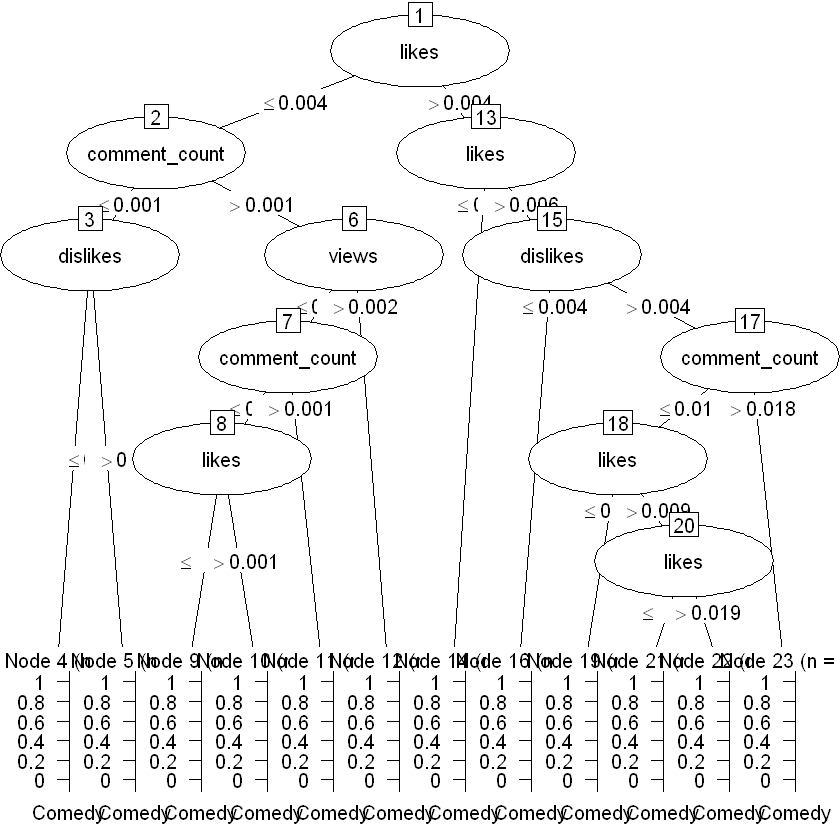

In [41]:

library("C50")

DT <- C5.0(formula = category_id ~., data =   ds.train)

summary(DT)
plot(DT)

In [42]:
DT.train_res = predict(DT, newdata = ds.train )
table(DT.train_res, ds.train$category_id)
mean(DT.train_res == ds.train$category_id)

            
DT.train_res Comedy Music Sports
      Comedy     14     0      0
      Music       2    36      1
      Sports      1     1     15

[1] 0.9285714

In [43]:
DT.test_res = predict(DT, newdata = ds.test)
table(DT.test_res, ds.test$category_id)
mean(DT.test_res == ds.test$category_id)

           
DT.test_res Comedy Music Sports
     Comedy      1     2      1
     Music       4     8      7
     Sports      1     2      4

[1] 0.4333333

In [44]:

library(e1071)

NB = naiveBayes(formula = category_id ~., data = ds.train)
summary(NB)


          Length Class  Mode     
apriori   3      table  numeric  
tables    4      -none- list     
levels    3      -none- character
isnumeric 4      -none- logical  
call      4      -none- call     

In [45]:
NB.train_res = predict(NB, newdata = ds.train)
table(NB.train_res, ds.train$category_id)
mean(NB.train_res == ds.train$category_id)

            
NB.train_res Comedy Music Sports
      Comedy      6    15      0
      Music       1     8      1
      Sports     10    14     15

[1] 0.4142857

In [46]:
NB.test_res = predict(NB, newdata = ds.test)
table(NB.test_res, ds.test$category_id)
mean(NB.test_res == ds.test$category_id)

           
NB.test_res Comedy Music Sports
     Comedy      2     4      1
     Music       0     3      2
     Sports      4     5      9

[1] 0.4666667